# Capstone Project - Week 5 - S.Hennessy


# Problem Description
A client is seeking to enter the mobile food business in the State of Maine by establishing a food truck operation. The client is a seasoned cook/chef with little exposure to business operations. Nevertheless, he wants to launch his dream of operating his own food truck.
The client shared two primary goals:
He wants to establish his business in an optimum location for the peak tourism season. He is already fired up for the 2019 season and plans to launch his business in the spring although he has not selected a region or city to pursue.
He wants to promote the local fishing industry by offering a selection of appealing seafood items, yet, he is unsure whether he can create enough revenue solely from a seafood-based menu. From his culinary experience, he is confident that seafood is the optimum food item to market.

# Background
The State of Maine is the most northeastern location in the USA. 

At one time, Maine’s primary source of revenue was based upon the harvesting of raw wood material through a significant Pulp and Paper industry. With the global collapse of the wood industry in the last decade or so and with the surge in local entrepreneurs, Maine diversified its work force into other streams and has recovered, somewhat, economically. 

Despite the downturn in the forestry industry, two sources of revenue have remained consistent: Tourism and Aquaculture. By tapping into both of these revenue streams, the client is seeking to optimize the volume of hungry customers by having his new food truck and mouthwatering seafood menu join the culinary landscape of mobile dining options in Maine.

Maine is a State that embraces all four seasons. Its climate responds well to year-round tourism-related activities (visitmaine.com). For his first year of operations, the client has decided to concentrate only on the peak tourism season. Summer vacation traffic is almost entirely driven by visitors interested in viewing, touring and staying along Maine’s Atlantic Ocean/Gulf of Maine coast line. This coast line is serviced by Maine’s Route 1 highway and is the basis for determining the ideal location in this Capstone project.

# Data Description
The source data will be built upon a collection of identified northeastern Towns along Route 1, from Kittery to Calais, a distance of 316 miles along the southeastern coastline of Maine. The initial list of 46 towns and 8 counties is only a starting point and will require augmentation from data scraping web sites for the Latitude and Longitude of the towns and the building of an appropriate data frame for use with data analysis. 

# Planned Data Analysis
The Maine Route 1 data frame will be layered with data from the Foursquare API and will be graphically represented on a Map. As part of the analysis, different facets of the foursquare API (e.g. search, similar, trending, etc.) will be used to build a robust understanding of the pros and cons of locating in each town.

To further data analysis and gain insight in determining the optimum location for the client’s food service, clustering will be performed. This clustering will be achieved through the application of unsupervised machine learning with the clustering algorithm k-means. Through the iterations of the k-means process optimum criteria will be identified for client’s selection of the location for operations and optimum food item(s).

# 1. Data Collection

Import from the required libraries

In [2]:
# import library to handle data in a vectorized manner
import numpy as np 

# import library for data analsysis
import pandas as pd  
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import library to handle requests
import requests 

# import library to handle CSV files
import csv  

#import matplotlib for plotting of graphs
import matplotlib as mpl
import matplotlib.pyplot as plt

print ("completed")

completed


Read the csv list of towns for data analysis.
This csv file is read into a pandas dataframe and will serve as the basis for addition of 
Latitude and Longitude for each location.

In [3]:
df_RT1_Maine = pd.read_csv("Maine Towns Details.csv") 
df_RT1_Maine

,Town,County,State,Country,Location Details
0,Kittery,York,Maine,USA,"Kittery, York, Maine, USA"
1,York,York,Maine,USA,"York, York, Maine, USA"
2,Wells,York,Maine,USA,"Wells, York, Maine, USA"
3,Kennebunk,York,Maine,USA,"Kennebunk, York, Maine, USA"
4,Biddeford,York,Maine,USA,"Biddeford, York, Maine, USA"
5,Saco,York,Maine,USA,"Saco, York, Maine, USA"
6,Scarborough,Cumberland,Maine,USA,"Scarborough, Cumberland, Maine, USA"
7,South Portland,Cumberland,Maine,USA,"South Portland, Cumberland, Maine, USA"
8,Portland,Cumberland,Maine,USA,"Portland, Cumberland, Maine, USA"
9,Falmouth,Cumberland,Maine,USA,"Falmouth, Cumberland, Maine, USA"


With the CSV file of Route 1 Maine towns applied to the dataframe, we now need to add Latitude & Longitude for each town.  For this operation, the details are applied toward three new columns (GeoDetail, Latititude and Longitude).  The first column is to validate that the geodetails refer to a specific town in Maine. The sixth and seventh columns to provide the Latitude & Longitude for each town.

In [4]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
print ("completed stage 1")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
#note geocode include to validate town is note misdirection from european namesake
df_RT1_Maine['GeoDetail'] = df_RT1_Maine['Location Details'].apply(geocode)
print ("completed stage 2")
#df_RT1_Maine['Latitude'] = df_RT1_Maine['GeoDetail'].apply(lambda location: (location.latitude, location.longitude))
df_RT1_Maine['Latitude'] = df_RT1_Maine['GeoDetail'].apply(lambda location: (location.latitude))
df_RT1_Maine['Longitude'] = df_RT1_Maine['GeoDetail'].apply(lambda location: (location.longitude))
print ("completed stage 3")
df_RT1_Maine

completed stage 1
completed stage 2
completed stage 3


,Town,County,State,Country,Location Details,GeoDetail,Latitude,Longitude
0,Kittery,York,Maine,USA,"Kittery, York, Maine, USA","(Kittery, York County, Maine, USA, (43.088448,...",43.088448,-70.736847
1,York,York,Maine,USA,"York, York, Maine, USA","(York, York County, Maine, USA, (43.1659436, -...",43.165944,-70.635096
2,Wells,York,Maine,USA,"Wells, York, Maine, USA","(Wells, York County, Maine, USA, (43.322181, -...",43.322181,-70.580978
3,Kennebunk,York,Maine,USA,"Kennebunk, York, Maine, USA","(Kennebunk, York County, Maine, USA, (43.38409...",43.384092,-70.545273
4,Biddeford,York,Maine,USA,"Biddeford, York, Maine, USA","(Biddeford, York County, Maine, USA, (43.49258...",43.492584,-70.453384
5,Saco,York,Maine,USA,"Saco, York, Maine, USA","(Saco, York County, Maine, 04072, USA, (43.500...",43.500918,-70.442829
6,Scarborough,Cumberland,Maine,USA,"Scarborough, Cumberland, Maine, USA","(Scarborough, Cumberland County, Maine, 04074,...",43.596226,-70.330056
7,South Portland,Cumberland,Maine,USA,"South Portland, Cumberland, Maine, USA","(South Portland, Cumberland County, Maine, USA...",43.641472,-70.240881
8,Portland,Cumberland,Maine,USA,"Portland, Cumberland, Maine, USA","(Portland, Cumberland County, Maine, USA, (43....",43.661028,-70.254860
9,Falmouth,Cumberland,Maine,USA,"Falmouth, Cumberland, Maine, USA","(Falmouth, Cumberland County, Maine, 04105, US...",43.729525,-70.241993


Remove columns that are no longer required and display the contents of the dataframe

In [5]:
#del df_RT1_Maine['State','Country','Location Details','GeoDetail']
del df_RT1_Maine['State']
del df_RT1_Maine['Country']
del df_RT1_Maine['Location Details']
del df_RT1_Maine['GeoDetail']

df_RT1_Maine

,Town,County,Latitude,Longitude
0,Kittery,York,43.088448,-70.736847
1,York,York,43.165944,-70.635096
2,Wells,York,43.322181,-70.580978
3,Kennebunk,York,43.384092,-70.545273
4,Biddeford,York,43.492584,-70.453384
5,Saco,York,43.500918,-70.442829
6,Scarborough,Cumberland,43.596226,-70.330056
7,South Portland,Cumberland,43.641472,-70.240881
8,Portland,Cumberland,43.661028,-70.254860
9,Falmouth,Cumberland,43.729525,-70.241993


It should be noted that Belfast in the county of Waldo is close to the mid point (@ 156 miles out of 316 miles) along the southern portion of  route 1 in Maine section being examined in this project. Hence, Belfast and its longitude and latitude (44.426119	-69.006736) will be used to define the center poing for mapping.

# 2. Select Mapping area

Import from the required libraries

In [6]:
# import Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#  import library to handle JSON files
import json 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# import k-means from clustering stage
from sklearn.cluster import KMeans

 # import map rendering library
import folium

print('Libraries imported.')

Libraries imported.


In [7]:

# create map of southern Maine using latitude and longitude values from Kittery, Maine and set the zoom level
map_maine = folium.Map(location=[43.088448,-70.736847], zoom_start=6)

# add markers to map
for Lat, Lng, County, Town in zip(df_RT1_Maine['Latitude'], df_RT1_Maine['Longitude'], df_RT1_Maine['County'], df_RT1_Maine['Town']):
    label = '{}, {}'.format(Town, County)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, Lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_maine)  
    
map_maine

Reset to smaller area for mapping

Given the wide geographic area, we will segment the above map based upon the Counties for the respective Towns. This will allow us to simplify clustering with the creation of new dataframes based upon county.

In [8]:
county_data1 = df_RT1_Maine[df_RT1_Maine['County'] == 'York'].reset_index(drop=True)
county_data1.head()

,Town,County,Latitude,Longitude
0,Kittery,York,43.088448,-70.736847
1,York,York,43.165944,-70.635096
2,Wells,York,43.322181,-70.580978
3,Kennebunk,York,43.384092,-70.545273
4,Biddeford,York,43.492584,-70.453384


To provide a view of the map based upon county, we pull the geo location for the county and redraw the map

In [9]:
# Pull the geo location for country and use for mapp
address = 'York County, ME'
geolocator = Nominatim(user_agent="my-application")# to be compliant and prevent 403 and 429 errors sytax of"my-application' is used
location = geolocator.geocode(address)
county_latitude = location.latitude
county_longitude = location.longitude
print('The geograpical coordinate of York County are {}, {}.'.format(county_latitude, county_longitude))

# create map of York County using latitude and longitude values pulled from geolocator and set the zoom level
map_county1 = folium.Map(location=[county_latitude,county_longitude], zoom_start=9.4)

# add markers to map
for Lat, Lng, County, Town in zip(county_data1 ['Latitude'], county_data1 ['Longitude'], county_data1 ['County'], county_data1 ['Town']):
    label = '{}, {}'.format(Town, County)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, Lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_county1)  
#Set marker for county geo location
    label = folium.Popup(County, parse_html=True)
    folium.CircleMarker(
        [county_latitude, county_longitude],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_county1)      
    
    
map_county1

The geograpical coordinate of York County are 43.4229305, -70.6546639.


# 3. FourSquare API data

Define FourSquare Credentials and Version

In [10]:
CLIENT_ID = 'ABNDQKNVYP5PWBIUJTMCHX34OPSLKPLHPHL4TETQVJGIEZTM' # your Foursquare ID
CLIENT_SECRET = 'AU3CXLMVQAKRCZJCIUEVFX0D30LX4EMZEM5CY50E4SNCFIEJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: ABNDQKNVYP5PWBIUJTMCHX34OPSLKPLHPHL4TETQVJGIEZTM
CLIENT_SECRET:AU3CXLMVQAKRCZJCIUEVFX0D30LX4EMZEM5CY50E4SNCFIEJ


Let's explore the first county in our dataframe.

In [11]:
#
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 120000 # define radiusas 100Km  / 60 Miles

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    county_latitude,
    county_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ABNDQKNVYP5PWBIUJTMCHX34OPSLKPLHPHL4TETQVJGIEZTM&client_secret=AU3CXLMVQAKRCZJCIUEVFX0D30LX4EMZEM5CY50E4SNCFIEJ&v=20180605&ll=43.4229305,-70.6546639&radius=120000&limit=100'

With the URl request created, send it to FourSquare and receive the json file for review

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c266b834c1f677d29da3a76'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Alfred',
  'headerFullLocation': 'Alfred',
  'headerLocationGranularity': 'city',
  'totalResults': 250,
  'suggestedBounds': {'ne': {'lat': 44.50293158000108,
    'lng': -69.17044919374881},
   'sw': {'lat': 42.34292941999892, 'lng': -72.1388786062512}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50d0efbde4b0fecb7f274397',
       'name': 'Village Tavern',
       'location': {'address': '110 Alfred Rd',
        'lat': 43.406401686773464,
        'lng': -70.57338460577489,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.406401686773464,
          

The following is a function used to extract the venue categories for filtering

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

clean up the json file and place into a pd dataframe

In [14]:
venues = results['response']['groups'][0]['items'] 
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name','venue.categories','venue.location.city', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,city,lat,lng
0,Village Tavern,American Restaurant,West Kennebunk,43.406402,-70.573385
1,Congdon's Doughnuts,Donut Shop,Wells,43.306432,-70.585085
2,Rachel Carson National Wildlife Refuge,Nature Preserve,Wells,43.347446,-70.548384
3,Wells Beach,Beach,Wells,43.302541,-70.566702
4,Rococo Artisan Ice Cream,Ice Cream Shop,Kennebunkport,43.362043,-70.476594
5,The Maine Diner,Diner,Wells,43.341794,-70.563127
6,Ogunquit Beach,Beach,Ogunquit,43.250342,-70.593937
7,Marginal Way Walk,Trail,Ogunquit,43.243314,-70.590440
8,Drakes Island Beach,Beach,Wells,43.321669,-70.553495
9,Drakes Island,Beach,Wells,43.325598,-70.551920


The results are skewed towards greater portland area and another approach is required.

# 4. Analysis of all selected towns on Maine's Coastal Route 1

The results are not gauged appropriately along route 1 location in Maine using the geo center of the county. So we will need to use the FourSquare API for towns along route 1 in the county to generate datasets closer to Route 1

Lets use a function to query the API for each town in the county and search for locations within 6 Miles (10KM)

In [16]:
def getCountyVenues(towns, latitudes, longitudes, radius=10000, limit=200):
    
    venues_list=[]
    for town, lat, lng in zip(towns, latitudes, longitudes):
        print(town)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            town,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    County_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    County_venues.columns = ['Town',
                  'Latitude', 
                  'Longitude', 
                  'Venue',   
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(County_venues)


Now test for county collection of data

In [17]:
local_county_venues = getCountyVenues(towns=county_data1['Town'],   
                                   latitudes=county_data1['Latitude'],
                                   longitudes=county_data1['Longitude']
                                  )

Kittery
York
Wells
Kennebunk
Biddeford
Saco


Display the resulting dataframe

In [18]:
print(local_county_venues.shape)
local_county_venues

(600, 7)


,Town,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kittery,43.088448,-70.736847,Tributary Brewing Company,43.090371,-70.735942,Brewery
1,Kittery,43.088448,-70.736847,The Black Birch,43.085805,-70.744154,Gastropub
2,Kittery,43.088448,-70.736847,Lil's,43.085915,-70.743462,Coffee Shop
3,Kittery,43.088448,-70.736847,Anju Noodle Bar,43.085812,-70.743627,Asian Restaurant
4,Kittery,43.088448,-70.736847,Tulsi,43.086387,-70.745017,Indian Restaurant
5,Kittery,43.088448,-70.736847,Beach Pea Baking Company,43.090030,-70.749025,Bakery
6,Kittery,43.088448,-70.736847,Prescott Park,43.077172,-70.752168,Park
7,Kittery,43.088448,-70.736847,Loco Coco's Tacos,43.087291,-70.747909,Mexican Restaurant
8,Kittery,43.088448,-70.736847,Moxy American Tapas Restaurant,43.077792,-70.756757,Tapas Restaurant
9,Kittery,43.088448,-70.736847,Ceres Bakery,43.077058,-70.756209,Bakery


Lets us see how many unique categories are available

In [19]:
print('There are {} uniques categories.'.format(len(local_county_venues['Venue Category'].unique())))

There are 116 uniques categories.


# Venues in each town in the county

In [20]:
# one hot encoding
county_onehot = pd.get_dummies(local_county_venues[['Venue Category']], prefix="", prefix_sep="")

# add town column back to dataframe
county_onehot['Town'] = local_county_venues['Town'] 

# move town column to the first column
fixed_columns = [county_onehot.columns[-1]] + list(county_onehot.columns[:-1])
county_onehot = county_onehot[fixed_columns]

county_onehot.head()

,Town,Accessories Store,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Butcher,Café,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Lighthouse,Liquor Store,Market,Mexican Restaurant,Mini Golf,Miscellaneous Shop,Motel,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pub,Record Shop,Rental Car Location,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Snack Place,Spa,Sporting Goods Shop,State / Provincial Park,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Zoo
0,Kittery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kittery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kittery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kittery,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kittery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Display this new dataframe size

In [21]:
county_onehot.shape

(600, 117)

Now determine the frequency of occurrence of each category when grouped by towns in the county

In [22]:
county_grouped = county_onehot.groupby('Town').mean().reset_index()
county_grouped

,Town,Accessories Store,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Butcher,Café,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Lighthouse,Liquor Store,Market,Mexican Restaurant,Mini Golf,Miscellaneous Shop,Motel,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pub,Record Shop,Rental Car Location,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Snack Place,Spa,Sporting Goods Shop,State / Provincial Park,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Zoo
0,Biddeford,0.00,0.04,0.00,0.01,0.01,0.00,0.02,0.02,0.01,0.09,0.00,0.00,0.00,0.01,0.02,0.03,0.02,0.00,0.00,0.03,0.04,0.01,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.01,0.00,0.03,0.01,0.01,0.01,0.00,0.04,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.04,0.00,0.01,0.00,0.01,0.01,0.02,0.05,0.01,0.04,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00
1,Kennebunk,0.00,0.09,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.08,0.04,0.00,0.00,0.00,0.02,0.03,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.02,0.02,0.01,0.01,0.00,0.01,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.05,0.01,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.01,0.02,0.01,0.01,0.12,0.02,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00
2,Kittery,0.00,0.03,0.00,0.01,0.02,0.01,0.04,0.01,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.04,0.02,0.01,0.01,0.04,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.03,0.00,0.03,0.01,0.01,0.03,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.01,0.00,0.00,0.04,0.01,0.02,0.01,0.00,0.00,0.00,0.03,0.00,0.07,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.02,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00
3,Saco,0.00,0.04,0.00,0.01,0.01,0.00,0.02,0.01,0.01,0.10,0.00,0.00,0.00,0.01,0.02,0.03,0.02,0.00,0.00,0.03,0.04,0.01,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.01,0.00,0.03,0.01,0.01,0.01,0.00,0.04,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.07,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.03,0.00,0.01,0.00,0.00,0.01,0.02,0.04,0.02,0.05,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00
4,Wells,0.00,0.09,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.12,0.00,0.01,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.0

Display this new grouping dataframe size

In [23]:
county_grouped.shape

(6, 117)

# Let's examine each town along with the top 10 most common venues

In [24]:
num_top_venues = 10

for Town in county_grouped['Town']:
    print("----"+Town+"----")
    temp = county_grouped[county_grouped['Town'] == Town].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Biddeford----
                 venue  freq
0                Beach  0.09
1       Sandwich Place  0.05
2       Ice Cream Shop  0.05
3           Donut Shop  0.04
4   Seafood Restaurant  0.04
5          Coffee Shop  0.04
6           Campground  0.04
7          Pizza Place  0.04
8  American Restaurant  0.04
9              Brewery  0.03


----Kennebunk----
                 venue  freq
0   Seafood Restaurant  0.12
1  American Restaurant  0.09
2                Beach  0.08
3                Hotel  0.05
4      Bed & Breakfast  0.04
5              Brewery  0.03
6        Deli / Bodega  0.03
7          Coffee Shop  0.03
8          Pizza Place  0.03
9           Donut Shop  0.02


----Kittery----
                 venue  freq
0   Seafood Restaurant  0.07
1                 Café  0.04
2              Brewery  0.04
3               Bakery  0.04
4          Pizza Place  0.04
5  American Restaurant  0.03
6                Hotel  0.03
7   Italian Restaurant  0.03
8       Sandwich Place  0.03
9          Coffe

# Place this data into a pd dataframe

First we use a function to sort venues in descending order

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Next create a dataframe to display the top 10 for each town in the county

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
towns_venues_sorted = pd.DataFrame(columns=columns)
towns_venues_sorted['Town'] = county_grouped['Town']

for ind in np.arange(county_grouped.shape[0]):
    towns_venues_sorted.iloc[ind, 1:] = return_most_common_venues(county_grouped.iloc[ind, :], num_top_venues)

towns_venues_sorted

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Biddeford,Beach,Sandwich Place,Ice Cream Shop,American Restaurant,Campground,Donut Shop,Pizza Place,Coffee Shop,Seafood Restaurant,Café
1,Kennebunk,Seafood Restaurant,American Restaurant,Beach,Hotel,Bed & Breakfast,Pizza Place,Deli / Bodega,Brewery,Coffee Shop,Restaurant
2,Kittery,Seafood Restaurant,Brewery,Café,Pizza Place,Bakery,Sandwich Place,American Restaurant,Italian Restaurant,Coffee Shop,Ice Cream Shop
3,Saco,Beach,Ice Cream Shop,Seafood Restaurant,Campground,Sandwich Place,American Restaurant,Coffee Shop,Donut Shop,Café,Movie Theater
4,Wells,Beach,Seafood Restaurant,American Restaurant,Pizza Place,Hotel,Café,Ice Cream Shop,Donut Shop,Breakfast Spot,Brewery
5,York,American Restaurant,Seafood Restaurant,Pizza Place,Beach,Hotel,Candy Store,Bakery,New American Restaurant,Coffee Shop,Ice Cream Shop


# 5. Top 10 for each town in each county

Steps will include looping through each town, running stats into a pd Dataframe

Lets use a function to query the API for each town along Route 1 and search for venues within 6 Miles (10KM)

In [27]:
def getRoute1Venues(towns, latitudes, longitudes, radius=10000, limit=200):
    
    route1_venues_list=[]
    for town, lat, lng in zip(towns, latitudes, longitudes):
        print(town)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        route1_venues_list.append([(
            town,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    Route1_venues = pd.DataFrame([item for venue_list in route1_venues_list for item in venue_list])
    Route1_venues.columns = ['Town',
                  'Latitude', 
                  'Longitude', 
                  'Venue',   
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(Route1_venues)

In [28]:

Route1_venues = getRoute1Venues(towns=df_RT1_Maine['Town'],
                                   latitudes=df_RT1_Maine['Latitude'],
                                   longitudes=df_RT1_Maine['Longitude']
                                  )

Kittery
York
Wells
Kennebunk
Biddeford
Saco
Scarborough
South Portland
Portland
Falmouth
Cumberland
Yarmouth
Freeport
Brunswick
West Bath
Bath
Woolwich
Wiscasset
Edgecomb
Newcastle
Damariscotta
Waldoboro
Warren
Thomaston
Rockport
Lincolnville
Belfast
Stockton Springs
Prospect
Bucksport
Ellsworth
Hancock
Sullivan
Gouldsboro
Milbridge
Cherryfield
Harrington
Columbia Falls
Jonesboro
Machias
East Machias
Whiting
Dennysville
Pembroke
Perry
Calais


Display the resulting dataframe for all identified towns along the Maine cost on Route 1

In [29]:
print(Route1_venues.shape)
Route1_venues

(2354, 7)


,Town,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kittery,43.088448,-70.736847,Tributary Brewing Company,43.090371,-70.735942,Brewery
1,Kittery,43.088448,-70.736847,The Black Birch,43.085805,-70.744154,Gastropub
2,Kittery,43.088448,-70.736847,Lil's,43.085915,-70.743462,Coffee Shop
3,Kittery,43.088448,-70.736847,Anju Noodle Bar,43.085812,-70.743627,Asian Restaurant
4,Kittery,43.088448,-70.736847,Tulsi,43.086387,-70.745017,Indian Restaurant
5,Kittery,43.088448,-70.736847,Beach Pea Baking Company,43.090030,-70.749025,Bakery
6,Kittery,43.088448,-70.736847,Prescott Park,43.077172,-70.752168,Park
7,Kittery,43.088448,-70.736847,Loco Coco's Tacos,43.087291,-70.747909,Mexican Restaurant
8,Kittery,43.088448,-70.736847,Moxy American Tapas Restaurant,43.077792,-70.756757,Tapas Restaurant
9,Kittery,43.088448,-70.736847,Ceres Bakery,43.077058,-70.756209,Bakery


#  Analysis of all venues in each identified town on Route 1 along the southern coast

In [30]:
# one hot encoding
route1_onehot = pd.get_dummies(Route1_venues[['Venue Category']], prefix="", prefix_sep="")

# add town column back to dataframe
route1_onehot['Town'] = Route1_venues['Town'] 

# move town column to the first column
fixed_columns = [route1_onehot.columns[-1]] + list(route1_onehot.columns[:-1])
route1_onehot = route1_onehot[fixed_columns]

route1_onehot.head()

,Town,Accessories Store,Airport,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bay,Beach,Bed & Breakfast,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,City,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Event Service,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Lake,Lighthouse,Lingerie Store,Liquor Store,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Ski Area,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Transportation Service,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Village,Wine Bar,Wine Shop,Winery,Zoo
0,Kittery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kittery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kittery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Display this new dataframe size for the Route 1 towns

In [31]:
route1_onehot.shape

(2354, 210)

Now determine the mean of the frequency of occurrence of each category when grouped by towns along Route 1

In [32]:
route1_grouped = route1_onehot.groupby('Town').mean().reset_index()
route1_grouped

,Town,Accessories Store,Airport,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bay,Beach,Bed & Breakfast,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,City,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Event Service,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Lake,Lighthouse,Lingerie Store,Liquor Store,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Resort,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Ski Area,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Transportation Service,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Village,Wine Bar,Wine Shop,Winery,Zoo
0,Bath,0.000000,0.000000,0.000000,0.047619,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.015873,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.015873,0.000000,0.015873,0.015873,0.031746,0.015873,0.000000,0.000000,0.00,0.031746,0.00,0.015873,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.031746,0.00,0.000000,0.000000,0.047619,0.000000,0.000000,0.00,0.000000,0.031746,0.000000,0.000000,0.000000,0.015873,0.000000,0.00,0.047619,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.047619,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.015873,0.00,0.000000,0.000000,0.015873,0.000000,0.00,0.000000,0.000000,0.000000,0.015873,0.031746,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.015873,0.015873,0.000000,0.031746,0.000000,0.047619,0.000000,0.000000,0.00,0.000000,0.000000,0.015873,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.0

Display the size details for new dataframe

In [33]:
route1_grouped.shape

(46, 210)

# The Top 10 list for venues along Route 1

In [34]:
Route1_venues.groupby('Venue Category').count()
Route1_Top10 = Route1_venues.groupby('Venue Category').count()
print(type(Route1_venues.groupby('Venue Category', axis=0)))

Route1_Top10.head()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,Town,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,3,3,3,3,3,3
Airport,3,3,3,3,3,3
Airport Terminal,1,1,1,1,1,1
American Restaurant,105,105,105,105,105,105
Animal Shelter,1,1,1,1,1,1


Drop columns that are not required

In [278]:
Route1_Top10.drop(Route1_Top10.columns[[0,1,2,4,5]], axis=1, inplace=True) 
#check that the selected columns have been dropped
Route1_Top10.head()

,Venue
Venue Category,
Accessories Store,3
Airport,1
Airport Terminal,2
American Restaurant,107
Animal Shelter,1


Sort the list for the top 10 venues for coastal maine along route 1 and export to new dataframe for plotting a graph

In [35]:
#Sort the venue count descending and assign to new dataframe labeled Route1_Top10list
Route1_Top10list=Route1_Top10.sort_values(by='Venue',ascending=0).head(10)


Generate chart to illustrate the popularity of Seafood Restaurants along Route 1

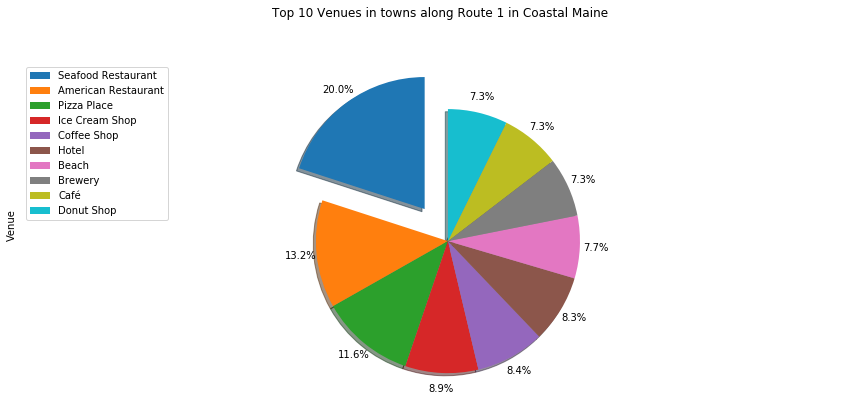

In [36]:
explode_list = [0.3, 0, 0, 0, 0, 0,0,0,0,0] 
Route1_Top10list['Venue'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                
                            pctdistance=1.12,            
                            explode=explode_list        
                            )
plt.title('Top 10 Venues in towns along Route 1 in Coastal Maine', y=1.12) 
plt.axis('equal') 
plt.legend(labels=Route1_Top10list.index, loc='upper left') 
plt.show()


# Examine the top 10 most common venues of identified towns along Route 1

With it confirmed that the Seafood Restaurant is the most common popular venue along Route 1, we now want to know what town is the best selection for a seafood restaurant

In [37]:
num_top_venues = 10

for Town in route1_grouped['Town']:
    print("----"+Town+"----")
    temp = route1_grouped[route1_grouped['Town'] == Town].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath----
                  venue  freq
0           Pizza Place  0.06
1  Fast Food Restaurant  0.05
2        Ice Cream Shop  0.05
3   American Restaurant  0.05
4    Seafood Restaurant  0.05
5     Convenience Store  0.05
6            Donut Shop  0.05
7      Department Store  0.03
8                  Café  0.03
9           Coffee Shop  0.03


----Belfast----
                 venue  freq
0                  Bar  0.07
1   Seafood Restaurant  0.07
2       Sandwich Place  0.04
3                 Café  0.04
4           Donut Shop  0.04
5  American Restaurant  0.04
6          Pizza Place  0.04
7                Motel  0.04
8             Pharmacy  0.04
9     Department Store  0.04


----Biddeford----
                 venue  freq
0                Beach  0.09
1       Ice Cream Shop  0.05
2       Sandwich Place  0.05
3           Campground  0.04
4          Pizza Place  0.04
5  American Restaurant  0.04
6          Coffee Shop  0.04
7   Seafood Restaurant  0.04
8           Donut Shop  0.04
9         

                    venue  freq
0          Breakfast Spot  0.08
1      Mexican Restaurant  0.08
2                    Food  0.08
3      Seafood Restaurant  0.08
4                    Park  0.08
5        Business Service  0.08
6  Transportation Service  0.08
7                    Café  0.08
8          Discount Store  0.08
9       French Restaurant  0.08


----Newcastle----
                venue  freq
0    Department Store  0.08
1      Sandwich Place  0.08
2  Seafood Restaurant  0.08
3      Ice Cream Shop  0.04
4          Campground  0.04
5           Bookstore  0.04
6       Movie Theater  0.04
7             Brewery  0.04
8        Burger Joint  0.04
9                Café  0.04


----Pembroke----
                   venue  freq
0          Boat or Ferry  0.25
1         Ice Cream Shop  0.25
2                 Forest  0.25
3           Intersection  0.25
4  Outdoors & Recreation  0.00
5                  Motel  0.00
6        Motorcycle Shop  0.00
7          Movie Theater  0.00
8          Moving Targ

Place all of the top 10 venues for the Route 1 towns into a pd dataframe. We will first use a function previously created ('return_most_common_venues') to sort venues in descending order

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
route1_venues_sorted = pd.DataFrame(columns=columns)
route1_venues_sorted['Town'] = route1_grouped['Town']

for ind in np.arange(route1_grouped.shape[0]):
    route1_venues_sorted.iloc[ind, 1:] = return_most_common_venues(route1_grouped.iloc[ind, :], num_top_venues)

route1_venues_sorted

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath,Pizza Place,Donut Shop,Ice Cream Shop,Seafood Restaurant,Convenience Store,Fast Food Restaurant,American Restaurant,Burger Joint,Café,Restaurant
1,Belfast,Bar,Seafood Restaurant,Convenience Store,Bakery,Sandwich Place,Pharmacy,Motel,Café,Pizza Place,Department Store
2,Biddeford,Beach,Sandwich Place,Ice Cream Shop,Seafood Restaurant,Campground,American Restaurant,Coffee Shop,Pizza Place,Donut Shop,Movie Theater
3,Brunswick,American Restaurant,Hotel,Sandwich Place,Convenience Store,Italian Restaurant,Fast Food Restaurant,Bakery,Harbor / Marina,Donut Shop,Coffee Shop
4,Bucksport,Seafood Restaurant,American Restaurant,Convenience Store,Fast Food Restaurant,City,Supermarket,Beach,Sandwich Place,Lake,Discount Store
5,Calais,Fast Food Restaurant,Sandwich Place,Diner,Convenience Store,Coffee Shop,Gas Station,Motel,Duty-free Shop,Donut Shop,Park
6,Cherryfield,Mexican Restaurant,Café,Breakfast Spot,Department Store,Discount Store,Seafood Restaurant,Fast Food Restaurant,Farmers Market,Farm,Fabric Shop
7,Columbia Falls,Grocery Store,Pizza Place,Convenience Store,Gourmet Shop,Golf Course,Sandwich Place,Liquor Store,Zoo,Electronics Store,Donut Shop
8,Cumberland,Seafood Restaurant,Coffee Shop,Pizza Place,American Restaurant,Bar,Cocktail Bar,Brewery,Ice Cream Shop,Wine Bar,Sushi Restaurant
9,Damariscotta,Seafood Restaurant,Sandwich Place,Department Store,Bookstore,Discount Store,Donut Shop,Fast Food Restaurant,Fish Market,Café,Supermarket


# 6. Clustering - via Unsupervised Machine Learning

Run k-means to cluster the towns into 5 clusters.

In [39]:
# set number of clusters
kclusters = 5

route1_grouped_clustering = route1_grouped.drop('Town', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(route1_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 3, 1, 1], dtype=int32)

Merge dataframes into a new dataframe for clustering

In [40]:
route1_merged = df_RT1_Maine

# add clustering labels
route1_merged['Cluster Labels'] = kmeans.labels_

# merge route1_grouped with route1_data to add latitude/longitude for each neighborhood
route1_merged = route1_merged.join(route1_venues_sorted.set_index('Town'), on='Town')

route1_merged.head() # check the last columns!

,Town,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kittery,York,43.088448,-70.736847,1,Seafood Restaurant,Pizza Place,Bakery,Brewery,Café,American Restaurant,Italian Restaurant,Ice Cream Shop,Sandwich Place,Hotel
1,York,York,43.165944,-70.635096,1,Seafood Restaurant,American Restaurant,Pizza Place,Beach,Hotel,Candy Store,Ice Cream Shop,Bakery,New American Restaurant,Coffee Shop
2,Wells,York,43.322181,-70.580978,1,Seafood Restaurant,Beach,American Restaurant,Pizza Place,Hotel,Café,Ice Cream Shop,Breakfast Spot,Donut Shop,Brewery
3,Kennebunk,York,43.384092,-70.545273,1,Seafood Restaurant,American Restaurant,Beach,Hotel,Bed & Breakfast,Coffee Shop,Deli / Bodega,Brewery,Pizza Place,Farm
4,Biddeford,York,43.492584,-70.453384,1,Beach,Sandwich Place,Ice Cream Shop,Seafood Restaurant,Campground,American Restaurant,Coffee Shop,Pizza Place,Donut Shop,Movie Theater


# Create the map of the generated clusters

In [41]:
# create map of southern Maine using latitude and longitude values from Kittery, Maine and set the zoom level
map_clusters = folium.Map(location=[43.088448,-70.736847], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(route1_merged['Latitude'], route1_merged['Longitude'], route1_merged['Town'], route1_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examination of the clusters

Cluster 0

In [42]:
route1_merged.loc[route1_merged['Cluster Labels'] == 0, route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Cumberland,Seafood Restaurant,Coffee Shop,Pizza Place,American Restaurant,Bar,Cocktail Bar,Brewery,Ice Cream Shop,Wine Bar,Sushi Restaurant


Cluster 1

In [43]:
route1_merged.loc[route1_merged['Cluster Labels'] == 1, route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kittery,Seafood Restaurant,Pizza Place,Bakery,Brewery,Café,American Restaurant,Italian Restaurant,Ice Cream Shop,Sandwich Place,Hotel
1,York,Seafood Restaurant,American Restaurant,Pizza Place,Beach,Hotel,Candy Store,Ice Cream Shop,Bakery,New American Restaurant,Coffee Shop
2,Wells,Seafood Restaurant,Beach,American Restaurant,Pizza Place,Hotel,Café,Ice Cream Shop,Breakfast Spot,Donut Shop,Brewery
3,Kennebunk,Seafood Restaurant,American Restaurant,Beach,Hotel,Bed & Breakfast,Coffee Shop,Deli / Bodega,Brewery,Pizza Place,Farm
4,Biddeford,Beach,Sandwich Place,Ice Cream Shop,Seafood Restaurant,Campground,American Restaurant,Coffee Shop,Pizza Place,Donut Shop,Movie Theater
5,Saco,Beach,Ice Cream Shop,Seafood Restaurant,Donut Shop,American Restaurant,Coffee Shop,Campground,Sandwich Place,Movie Theater,Theme Park
6,Scarborough,Brewery,Pizza Place,American Restaurant,Beach,Bar,Coffee Shop,Deli / Bodega,Donut Shop,Bakery,BBQ Joint
8,Portland,Seafood Restaurant,Pizza Place,Coffee Shop,American Restaurant,Brewery,Bar,Ice Cream Shop,Breakfast Spot,Hotel,Restaurant
9,Falmouth,Brewery,Coffee Shop,Seafood Restaurant,Pizza Place,Ice Cream Shop,Trail,Bakery,Italian Restaurant,Restaurant,Breakfast Spot
11,Yarmouth,Clothing Store,Seafood Restaurant,American Restaurant,Hotel,Pizza Place,Café,Ice Cream Shop,Bakery,Gift Shop,Italian Restaurant


Cluster 2

In [44]:
route1_merged.loc[route1_merged['Cluster Labels'] == 2, route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Stockton Springs,History Museum,State / Provincial Park,Lighthouse,Bakery,Park,Grocery Store,Diner,Campground,Donut Shop,Scenic Lookout


Cluster 3

In [45]:
route1_merged.loc[route1_merged['Cluster Labels'] == 3, route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,South Portland,Seafood Restaurant,Pizza Place,Coffee Shop,Bar,Bakery,Brewery,Breakfast Spot,Ice Cream Shop,American Restaurant,Park
18,Edgecomb,Seafood Restaurant,American Restaurant,Gift Shop,Café,Fast Food Restaurant,Gastropub,Sporting Goods Shop,Restaurant,Convenience Store,Discount Store


Cluster 4

In [46]:
route1_merged.loc[route1_merged['Cluster Labels'] == 4, route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Belfast,Bar,Seafood Restaurant,Convenience Store,Bakery,Sandwich Place,Pharmacy,Motel,Café,Pizza Place,Department Store


# 7. FINAL ANALYSIS

Based upon various iterations and quantity of Clustering performed, we have excluded cluster 0 from final analysis.  The seven towns that are outliers in clusters 1,2,3, & 4 will be reviewed for final location identification.

In [47]:
outlier_town_data=df_RT1_Maine[df_RT1_Maine.Town.isin(['Cumberland','Belfast','Stockton Springs','Scarborough','Rockport','South Portland','Edgecomb'])]
outlier_town_data

,Town,County,Latitude,Longitude,Cluster Labels
6,Scarborough,Cumberland,43.596226,-70.330056,1
7,South Portland,Cumberland,43.641472,-70.240881,3
10,Cumberland,Cumberland,43.655499,-70.259263,0
18,Edgecomb,Lincoln,43.958413,-69.630602,3
24,Rockport,Knox,44.184524,-69.076149,1
26,Belfast,Waldo,44.426119,-69.006736,4
27,Stockton Springs,Waldo,44.489520,-68.856976,2


# Pull FourSquare details on the seven outlier towns

Based upon the top 10 venue lists below, there is only one town that does not have Seafood Restaurant listed(Scarborough).  That however is mitigated by the fact that it is immediately adjacent to Portland. With Cumberland,Scarborough & South Portland in relatively densly populated area (within 10 miles of Portland and a significant number of Seafood Restaurants) they are removed from consideration for selection.

In [48]:
route1_merged.loc[route1_merged['Town'] == 'Scarborough', route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,Brewery,Pizza Place,American Restaurant,Beach,Bar,Coffee Shop,Deli / Bodega,Donut Shop,Bakery,BBQ Joint


In [49]:

route1_merged.loc[route1_merged['Town'] == 'South Portland', route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,South Portland,Seafood Restaurant,Pizza Place,Coffee Shop,Bar,Bakery,Brewery,Breakfast Spot,Ice Cream Shop,American Restaurant,Park


In [50]:
route1_merged.loc[route1_merged['Town'] == 'Cumberland', route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]


,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Cumberland,Seafood Restaurant,Coffee Shop,Pizza Place,American Restaurant,Bar,Cocktail Bar,Brewery,Ice Cream Shop,Wine Bar,Sushi Restaurant


This leaves the final four towns for review and selection of the optimun location of the seafood restaurant.  They are Belfast, Rockport, Edgecomb and Stockton Springs as shown below. 

In [51]:
route1_merged.loc[route1_merged['Town'] == 'Belfast', route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Belfast,Bar,Seafood Restaurant,Convenience Store,Bakery,Sandwich Place,Pharmacy,Motel,Café,Pizza Place,Department Store


In [52]:
route1_merged.loc[route1_merged['Town'] == 'Rockport', route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Rockport,Seafood Restaurant,Bed & Breakfast,Hotel,Café,Food & Drink Shop,New American Restaurant,Ice Cream Shop,Bagel Shop,Coffee Shop,Mexican Restaurant


In [53]:
route1_merged.loc[route1_merged['Town'] == 'Edgecomb', route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Edgecomb,Seafood Restaurant,American Restaurant,Gift Shop,Café,Fast Food Restaurant,Gastropub,Sporting Goods Shop,Restaurant,Convenience Store,Discount Store


In [54]:
route1_merged.loc[route1_merged['Town'] == 'Stockton Springs', route1_merged.columns[[0] + list(range(5, route1_merged.shape[1]))]]

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Stockton Springs,History Museum,State / Provincial Park,Lighthouse,Bakery,Park,Grocery Store,Diner,Campground,Donut Shop,Scenic Lookout


# Augment selection data

While tourism is the major contributor to revenue for a venue and sites of interest is a key factor (order of towns with most to least are : Rockport-8;Belfast-5; Stockton Springs-2; Edgecomb-0, source: wikipedia), additional details on town makeup are needed to determine the viability of year round operations in addition to tourism revenue.

To obtain data as up to date as possible, the Maine Department of Adminsstrative and Financial Services for Econmic & Demographics details on the Government of Maine web portal was accessed (http://econ.maine.gov/index/build). From this page details were extracted into CSV files. Three areas were selected in determining the year round viability for runing a seafood restaurant.  The belief is that a higher level of household income, retail sales and higher educational attainment are key determining factors.  Specifically, the factors retreived for each town are:
- Income : 2016 Median Household
- Taxable Retail Sales Quarterly (2018 Q1,Q2 & Q3) by County
- Educational Attainment

# And the Lucky Town is....

Illustrate the stats with graphs. Begin by importing the CSV files for each factor, convert to dataframe and generate a graph.

In [165]:
df_TownData = pd.read_csv('Town Stats - Median Household Income.csv') 
df_TownData.set_index('Town', inplace=True)
df_TownData

,"Income - Median Household, 2016"
Town,
Edgecomb,58234
Rockport,72679
Belfast,40625
Stockton Springs,48750


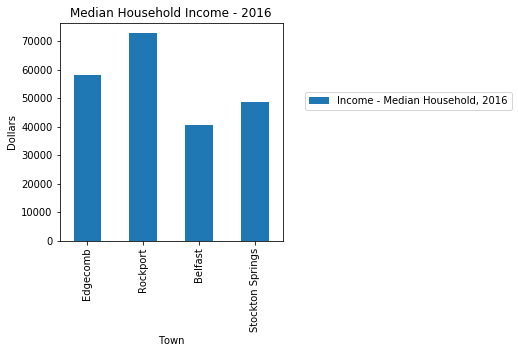

In [166]:
# generate histogram
df_TownData.plot(kind='bar', figsize=(4, 4))

plt.xlabel('Town') # add to x-label to the plot
plt.ylabel('Dollars') # add y-label to the plot
plt.title('Median Household Income - 2016') # add title to the plot
plt.legend(loc=(1.1,0.6))#set the location of the legend
plt.show()

In [168]:
df_TownData = pd.read_csv('Town Stats - Taxable sales.csv') 
df_TownData.set_index('Quarter', inplace=True)
df_TownData

,Edgecomb,Rockport,Belfast,Stockton Springs
Quarter,,,,
2018-Q1,65355.195,111784.170,55616.109,55616.109
2018-Q2,108493.763,160768.789,78180.342,78180.342
2018-Q3,161419.674,212556.354,95643.306,95643.306


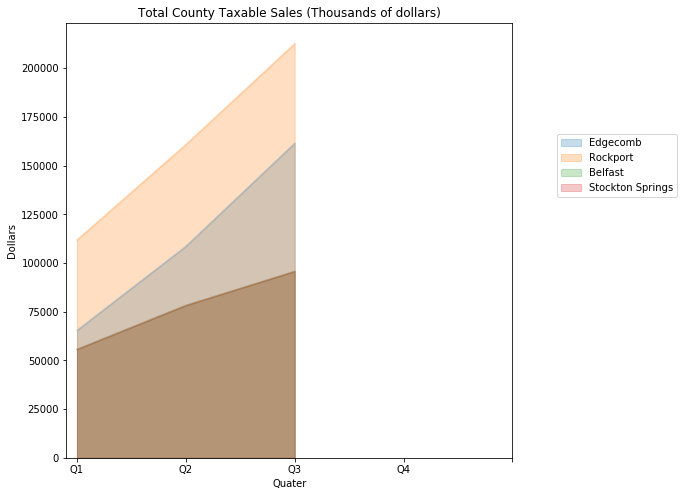

In [169]:
df_TownData.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(8,8), # pass a tuple (x, y) size
             )

plt.title('Total County Taxable Sales (Thousands of dollars)')
plt.ylabel('Dollars')
plt.xlabel('Quater')
my_xticks = ['Q1','Q2','Q3','Q4']
plt.xticks(x, my_xticks)
plt.legend(loc=(1.1,0.6))#set the location of the legend
plt.show()

In [170]:
df_TownData = pd.read_csv('Town Stats - Education.csv') 
df_TownData.set_index('Town', inplace=True)
df_TownData

,High School Graduate or Higher,Bachelor's Degree or Higher
Town,,
Edgecomb,95.9,41.7
Rockport,97.3,44.1
Belfast,91.6,41.4
Stockton Springs,95.1,30.3


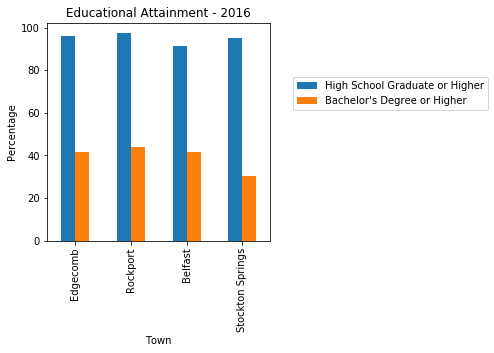

In [155]:
# generate histogram
df_TownData.plot(kind='bar', figsize=(4, 4))

plt.xlabel('Town') # add to x-label to the plot
plt.ylabel('Percentage') # add y-label to the plot
plt.title('Educational Attainment - 2016') # add title to the plot
plt.legend(loc=(1.1,0.6))#set the location of the legend
plt.show()

# And the Lucky Town is....

As shown above, the clear choice for town selection is Rockport. 

The town has the following factors in its favor:
- Greatest number of points of interest for tourism 
- Generated the largest sales volume for the first three quaters of 2018
- Largest median income
- Highest level of educational attainment

The quantity of points of interest leads to greater likelyhood of capturing tourism traffic in the local area during the summer months.  During the off season from the tourism revenue stream, we would want to have a stable economic base with likelyhood of increased disposable income for dining at a restaurant. Again, Rockport leads against the four finalist.

Rockport is selected as the preferred location for a Seafood Restaurant!
